<a href="https://colab.research.google.com/github/SergJohn/Crypto-Prediction-2022-Project/blob/main/ExpoSmoth_ETH_GBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade pandas pip install --upgrade pandas-datareader

     |████████████████████████████████| 2.1 MB 4.6 MB/s 
     |████████████████████████████████| 109 kB 41.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
pip install pandas-datareader

In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [6]:
# Data2 Getting Yahoo Finance from pdr = data from 2020 afterwards
data_eth = pdr.get_data_yahoo('ETH-GBP')

In [7]:
# Load all related libraries
import esFunctions as es
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import axes

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [8]:
data_eth.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-11,242.230057,226.108566,226.407333,238.611618,638687437,238.611618
2017-11-12,241.910873,226.351990,238.618439,234.685974,1229786537,234.685974
2017-11-13,250.373566,233.995117,234.012955,241.417801,794183996,241.417801
2017-11-14,259.439453,241.472031,241.453613,256.617004,813012085,256.617004
2017-11-15,259.169830,250.541626,256.870087,253.080017,548638008,253.080017


In [9]:
data_eth.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [10]:
data_eth.head()

,Close
Date,
2017-11-11,238.611618
2017-11-12,234.685974
2017-11-13,241.417801
2017-11-14,256.617004
2017-11-15,253.080017


In [12]:
# Comapre Single exponential smooting for three values of alpha (0.2, 0.6, 0.8)
data_eth['SES2'] = es.single_exp_smoothing(data_eth['Close'], 0.2)
data_eth['SES6'] = es.single_exp_smoothing(data_eth['Close'], 0.6)
data_eth['SES8'] = es.single_exp_smoothing(data_eth['Close'], 0.8)

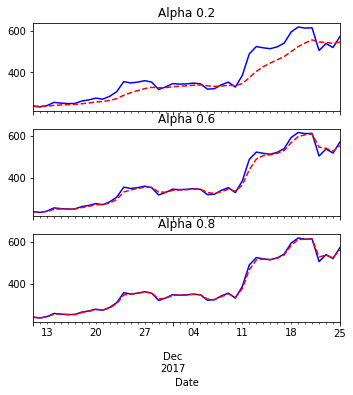

In [13]:
# plot three figures for three values of alpha
f, axarr = plt.subplots(3, sharex = True)
f.set_size_inches(5.5, 5.5)

data_eth['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
data_eth['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

data_eth['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
data_eth['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

data_eth['Close'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
data_eth['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')
plt.savefig('_02_02.png', format='png', dpi=300)

In [14]:
Pricing_forecast = data_eth['SES8'].iloc[:45]
df_test = data_eth['Close'].iloc[:45]

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f'Mean Absolute Error = {mean_absolute_error(df_test, Pricing_forecast)}')
print(f'Mean Squared Error = {mean_squared_error(df_test, Pricing_forecast)}')
print(f'r^2 score = {r2_score(df_test, Pricing_forecast)}')

Mean Absolute Error = 3.8561330787363164
Mean Squared Error = 41.10227893577262
r^2 score = 0.9970997746715671


In [16]:
Pricing_forecast = data_eth['SES2'].iloc[:45]
df_test = data_eth['Close'].iloc[:45]

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f'Mean Absolute Error = {mean_absolute_error(df_test, Pricing_forecast)}')
print(f'Mean Squared Error = {mean_squared_error(df_test, Pricing_forecast)}')
print(f'r^2 score = {r2_score(df_test, Pricing_forecast)}')

Mean Absolute Error = 32.26338695494901
Mean Squared Error = 2065.3893920240957
r^2 score = 0.8542636860310069
